In [ ]:
#imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
# carregar dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()
print(imagens_treino.shape, imagens_teste.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
# Parametros gerais
_LEARNING_RATE_ = 0.001
_EPOCHS_ = 10
_BATCH_SIZE_ = 200

In [ ]:
_N_ENTRADA_ = 784 # dados de entrada MNIST (imagens com dimensão 28 x 28)
_N_CAMADA_1_ = 30 # neuronios da 1 camada oculta
_N_CAMADA_1_ = 30 # neuronios da 2 camada oculta
_N_CLASSES_ = 10  # total de classes MNIST (dígitos 0-9)

In [ ]:
# Exploração dos dados
print(len(imagens_treino))
print(len(imagens_teste))
print (imagens_treino.shape, imagens_teste.shape)

60000
10000
(60000, 28, 28) (10000, 28, 28)


In [ ]:
print('Min:', identificacoes_treino.min())
print('Max:', identificacoes_treino.max())

Min: 0
Max: 9


In [ ]:
print(type(identificacoes_treino))

<class 'numpy.ndarray'>


In [ ]:
type(identificacoes_treino[0])

numpy.uint8

Text(0.5, 1.0, '3')

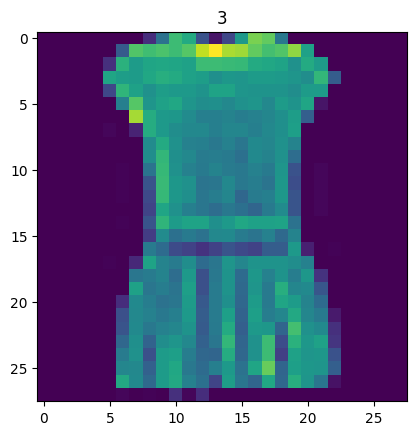

In [ ]:
plt.imshow(imagens_treino[3])
plt.title(identificacoes_treino[3])

In [ ]:
identificacoes_treino.min()
identificacoes_treino.max()

9

In [ ]:
nomes_de_classificacoes = [ 'Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

In [ ]:
print(type(identificacoes_treino[0]))

In [ ]:
print(type(imagens_treino[0]))

<class 'numpy.ndarray'>


In [ ]:
#plt.imshow(imagens_treino[0])
print(type(identificacoes_treino[0]))

<class 'numpy.uint8'>


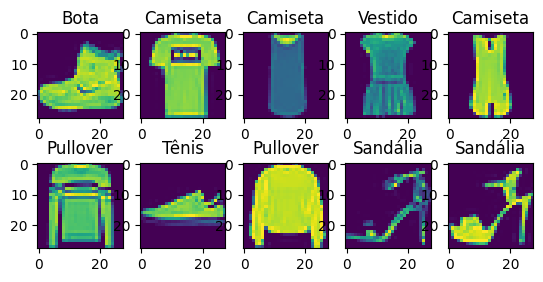

In [ ]:
for imagem in range(10):
  plt.subplot(3,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [ ]:
imagens_treino = imagens_treino / float(255)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [ ]:
imagens_treino[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelo.fit(imagens_treino, identificacoes_treino, validation_split=0.33, epochs=20, verbose=2)

Epoch 1/20
1257/1257 - 7s - loss: 0.5449 - accuracy: 0.8066 - val_loss: 0.4237 - val_accuracy: 0.8429 - 7s/epoch - 6ms/step
Epoch 2/20
1257/1257 - 5s - loss: 0.4073 - accuracy: 0.8532 - val_loss: 0.3851 - val_accuracy: 0.8621 - 5s/epoch - 4ms/step
Epoch 3/20
1257/1257 - 4s - loss: 0.3704 - accuracy: 0.8640 - val_loss: 0.3916 - val_accuracy: 0.8543 - 4s/epoch - 3ms/step
Epoch 4/20
1257/1257 - 4s - loss: 0.3477 - accuracy: 0.8720 - val_loss: 0.3561 - val_accuracy: 0.8707 - 4s/epoch - 3ms/step
Epoch 5/20
1257/1257 - 5s - loss: 0.3287 - accuracy: 0.8778 - val_loss: 0.3515 - val_accuracy: 0.8713 - 5s/epoch - 4ms/step
Epoch 6/20
1257/1257 - 4s - loss: 0.3157 - accuracy: 0.8836 - val_loss: 0.3389 - val_accuracy: 0.8757 - 4s/epoch - 3ms/step
Epoch 7/20
1257/1257 - 4s - loss: 0.3033 - accuracy: 0.8881 - val_loss: 0.3262 - val_accuracy: 0.8808 - 4s/epoch - 3ms/step
Epoch 8/20
1257/1257 - 6s - loss: 0.2917 - accuracy: 0.8919 - val_loss: 0.3260 - val_accuracy: 0.8872 - 6s/epoch - 5ms/step
Epoch 9/

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


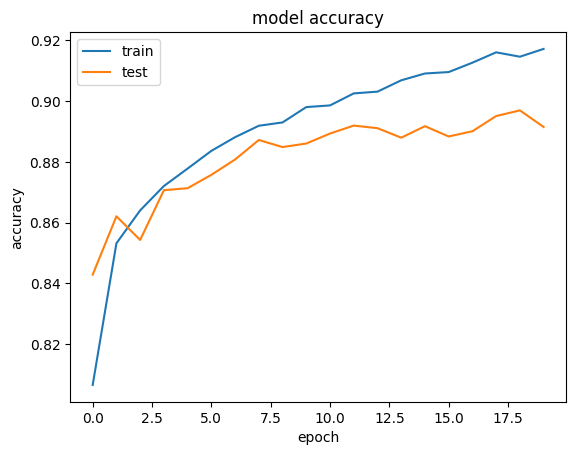

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


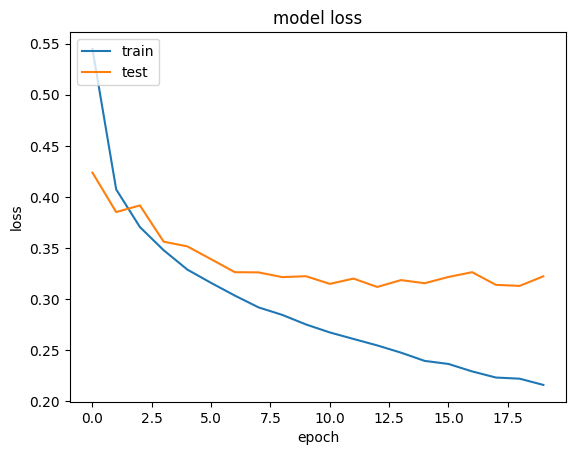

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history['val_loss']

[0.4237353503704071,
 0.385080486536026,
 0.3916039764881134,
 0.3560839593410492,
 0.3514503836631775,
 0.3389059603214264,
 0.32619866728782654,
 0.32597750425338745,
 0.3213610053062439,
 0.3222220540046692,
 0.3147388994693756,
 0.3199179470539093,
 0.3117012679576874,
 0.3184266984462738,
 0.3153672218322754,
 0.32149046659469604,
 0.3261856138706207,
 0.31378012895584106,
 0.31274813413619995,
 0.32215967774391174]

In [ ]:
history.history['accuracy']

[0.8066121339797974,
 0.8532053232192993,
 0.8640264868736267,
 0.8720366358757019,
 0.8777830004692078,
 0.8836040496826172,
 0.888106644153595,
 0.8918629884719849,
 0.8929575085639954,
 0.8980073928833008,
 0.8985546827316284,
 0.9025099873542786,
 0.9030821919441223,
 0.9068136215209961,
 0.9090524911880493,
 0.9095250964164734,
 0.9126097559928894,
 0.9160178303718567,
 0.9145749807357788,
 0.9171372652053833]

In [ ]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


In [ ]:
testes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

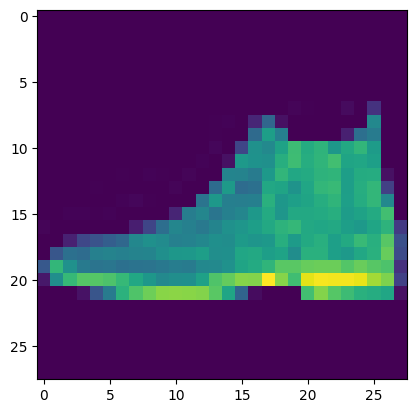

In [ ]:
plt.imshow(imagens_teste[0])

In [ ]:
import numpy as np

print('Resultado teste: ', np.argmax(testes[10]))
print('Numero da imagem de teste:', identificacoes_teste[10])

Resultado teste:  4
Numero da imagem de teste: 4


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 2ms/step - loss: 75.8506 - accuracy: 0.8573


In [ ]:
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

Perda do teste:  75.8506088256836
Acurácia do teste:  0.8572999835014343


In [ ]:
modelo.save('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')

In [ ]:
testes = modelo.predict(imagens_teste)
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

print('resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Numero da imagem do teste: ', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo:  2
Numero da imagem do teste:  2


In [ ]:
testes_modelo_salvo.shape

(10000, 10)

In [ ]:
print('Resultado teste: ', np.argmax(testes_modelo_salvo[10]))
print('Numero da imagem de teste:', identificacoes_teste[10])

Resultado teste:  4
Numero da imagem de teste: 4
